In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.1.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.4
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [3]:
conso = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [4]:
import os.path, time
print("Dernière modification: %s" % time.ctime(os.path.getmtime("2016_Building_Energy_Benchmarking.csv")))

Dernière modification: Thu Jun 30 13:05:47 2022


In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [6]:
conso.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
conso.shape

(3376, 46)

Comme indiqué sur 'https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy', chaque ligne correspond à un building

In [8]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
conso.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


On va vérifier le 'BuildingType' puisque selon l'énoncé, l'analyse doit porter sur les bâtiments non destinés à l'habitation

In [10]:
building_type = conso.groupby(by=["BuildingType"])['OSEBuildingID'].count()
building_type

BuildingType
Campus                    24
Multifamily HR (10+)     110
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
NonResidential          1460
Nonresidential COS        85
Nonresidential WA          1
SPS-District K-12         98
Name: OSEBuildingID, dtype: int64

In [11]:
conso = conso[~conso['BuildingType'].str.contains("Multifamily")]
conso['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [12]:
conso.shape

(1668, 46)

In [13]:
doublons = conso.loc[conso[['OSEBuildingID']].duplicated(keep=False),:]
doublons

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


il n'y a pas de doublons identifiés

## Revue des valeurs nulles

In [14]:
val_null = conso.isnull().sum().sort_values(ascending = False)
val_null

Comments                           1668
Outlier                            1651
YearsENERGYSTARCertified           1570
ThirdLargestPropertyUseType        1315
ThirdLargestPropertyUseTypeGFA     1315
SecondLargestPropertyUseType        813
SecondLargestPropertyUseTypeGFA     813
ENERGYSTARScore                     574
ZipCode                              16
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SiteEUIWN(kBtu/sf)                    3
SiteEUI(kBtu/sf)                      3
SiteEnergyUseWN(kBtu)                 3
SteamUse(kBtu)                        2
SiteEnergyUse(kBtu)                   2
SourceEUIWN(kBtu/sf)                  2
SourceEUI(kBtu/sf)                    2
Electricity(kWh)                      2
Electricity(kBtu)                     2
NaturalGas(therms)                    2
NaturalGas(kBtu)                      2
TotalGHGEmissions                     2
GHGEmissionsIntensity                 2
NumberofBuildings                     2


In [15]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

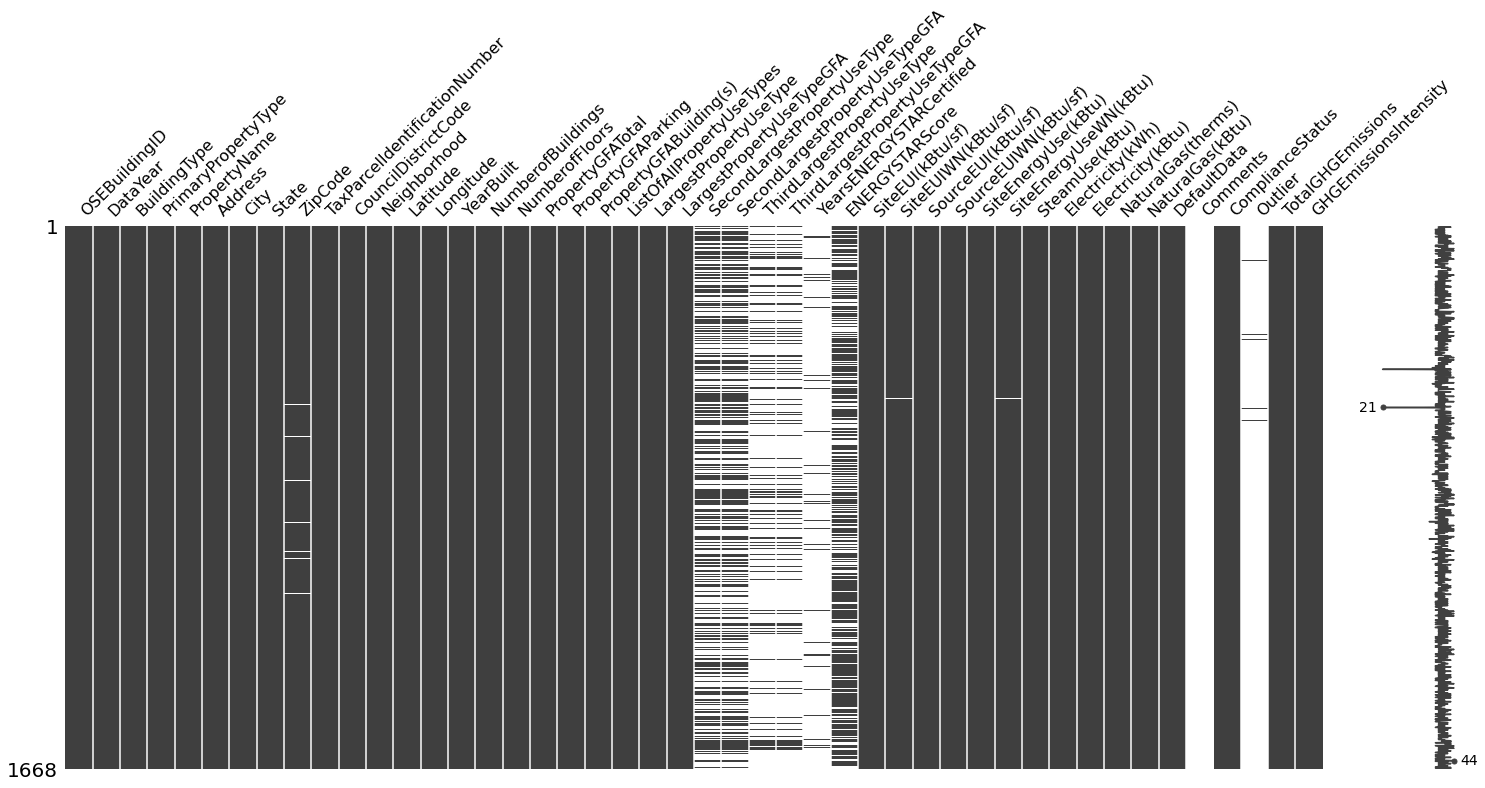

In [16]:
msno.matrix(conso.sample(len(conso)))

<AxesSubplot:>

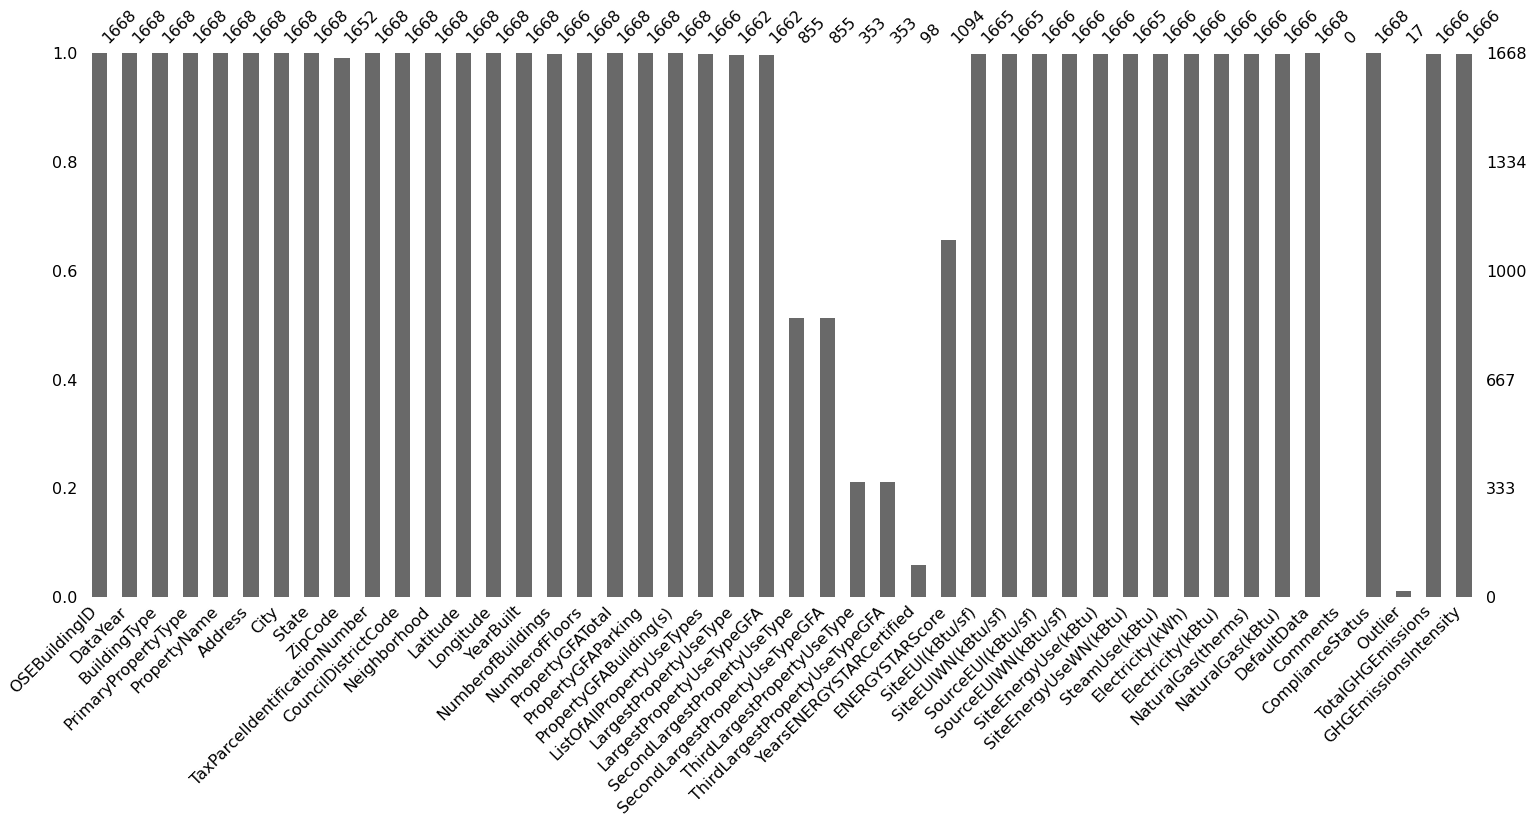

In [17]:
msno.bar(conso.sample(len(conso)))

In [18]:
taux_remplissage = conso.notnull().mean()*100

In [19]:
taux_remplissage = taux_remplissage.sort_values(ascending=False).reset_index()
taux_remplissage.columns = ['Variable','Taux_de_Remplissage']
taux_remplissage

,Variable,Taux_de_Remplissage
0,OSEBuildingID,100.000000
1,Neighborhood,100.000000
2,DataYear,100.000000
3,DefaultData,100.000000
4,PropertyGFABuilding(s),100.000000
5,PropertyGFAParking,100.000000
6,PropertyGFATotal,100.000000
7,NumberofFloors,100.000000
8,ComplianceStatus,100.000000
9,Longitude,100.000000


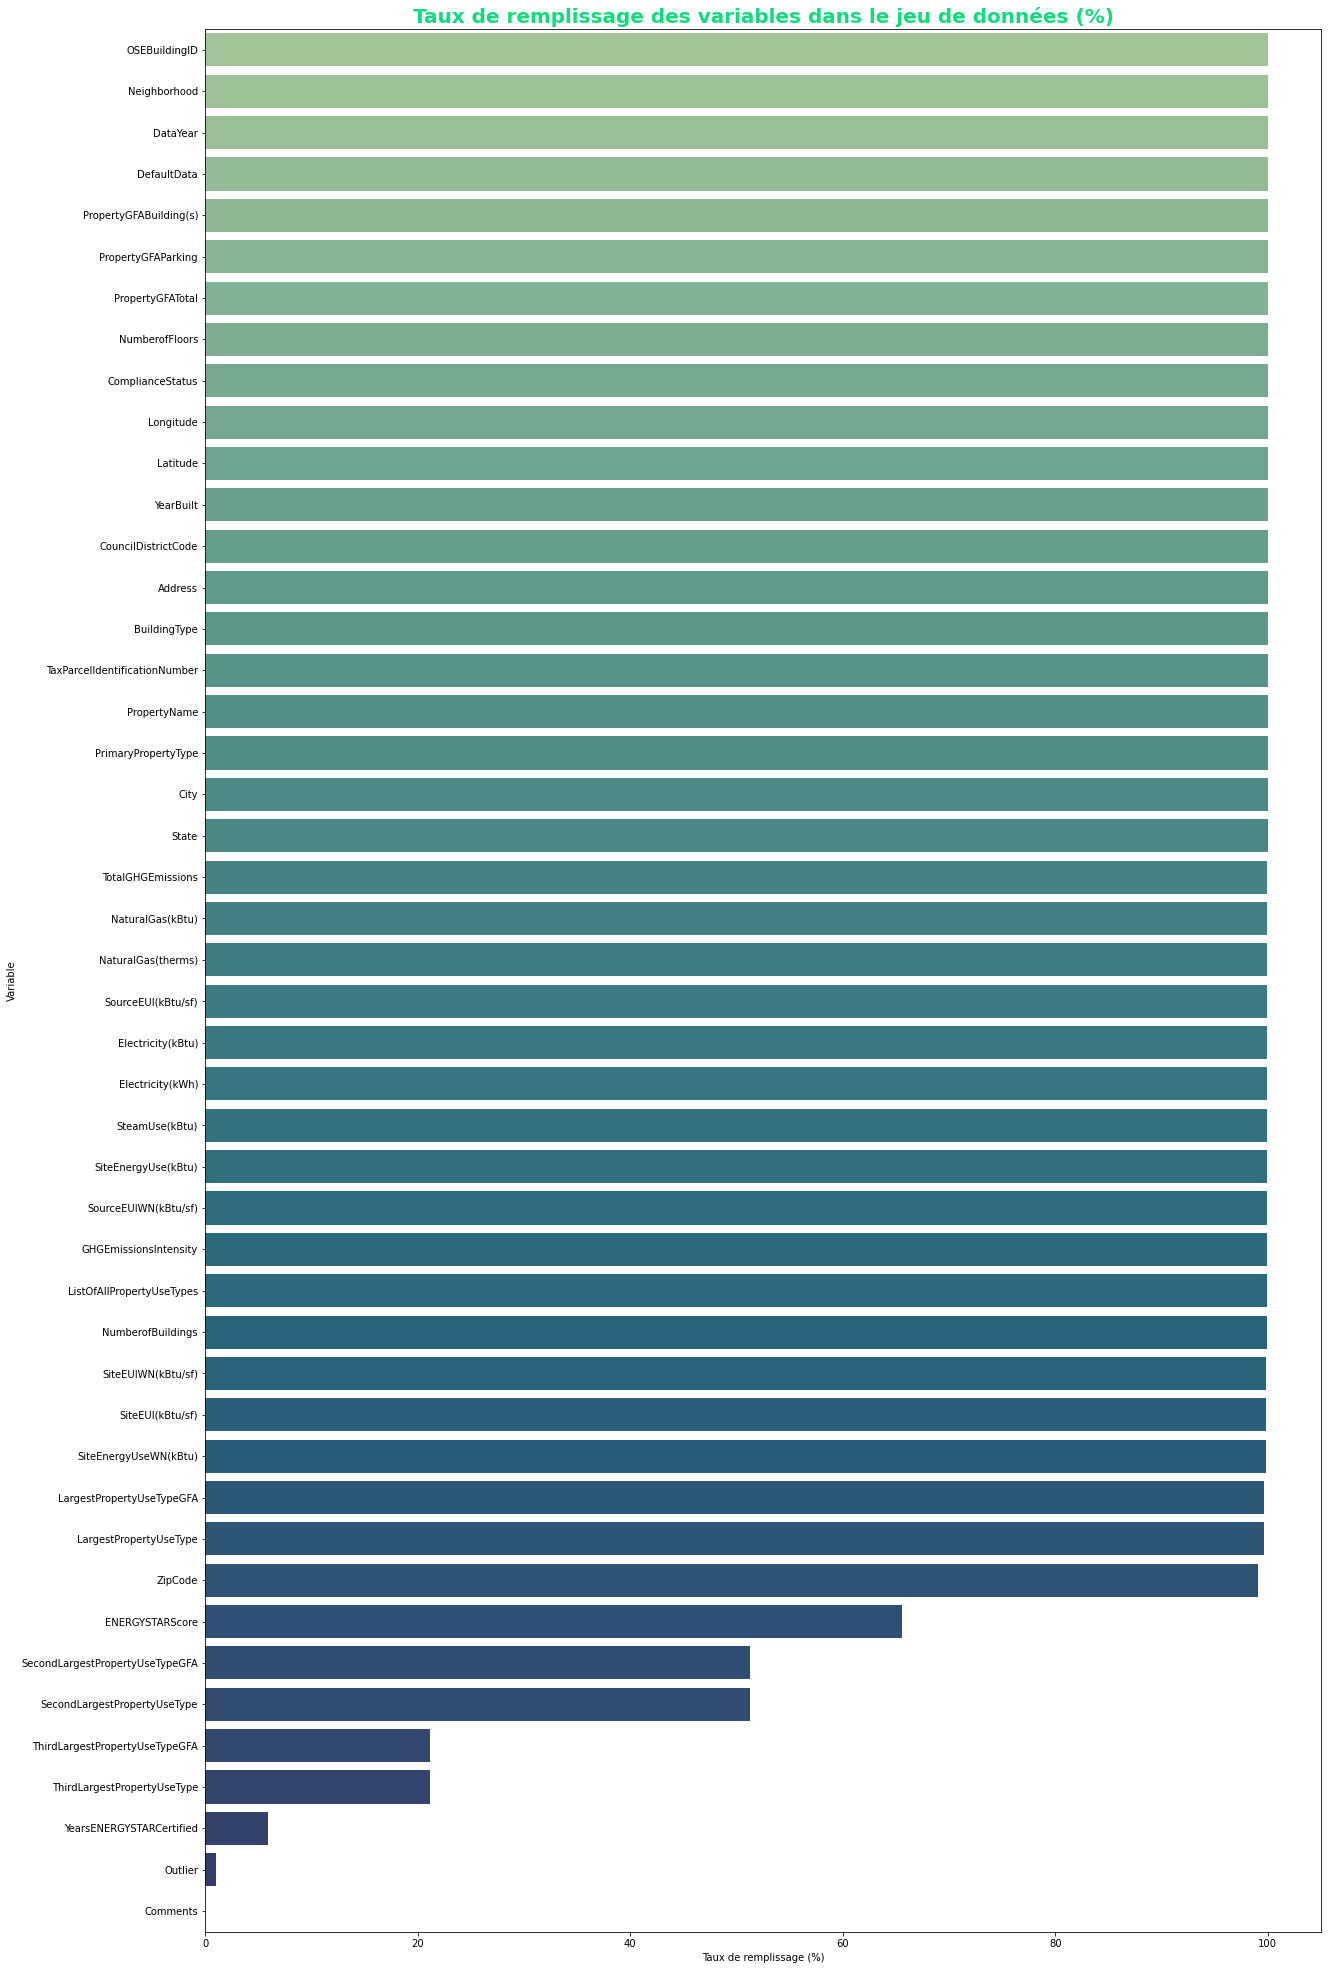

In [20]:
fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'DejaVu Sans',
              'color':  '#12db7d',
              'weight': 'bold',
              'size': 20,
             }

sns.barplot(x='Taux_de_Remplissage', y='Variable', data=taux_remplissage, palette="crest")

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [21]:
for colonne in conso.columns:
    print('\n',colonne)
    print('Qté Nan : ', round(conso[colonne].isna().sum()/conso[colonne].shape[0]*100), '%')
    print('Uniques : ', conso[colonne].nunique())


 OSEBuildingID
Qté Nan :  0 %
Uniques :  1668

 DataYear
Qté Nan :  0 %
Uniques :  1

 BuildingType
Qté Nan :  0 %
Uniques :  5

 PrimaryPropertyType
Qté Nan :  0 %
Uniques :  22

 PropertyName
Qté Nan :  0 %
Uniques :  1664

 Address
Qté Nan :  0 %
Uniques :  1647

 City
Qté Nan :  0 %
Uniques :  1

 State
Qté Nan :  0 %
Uniques :  1

 ZipCode
Qté Nan :  1 %
Uniques :  48

 TaxParcelIdentificationNumber
Qté Nan :  0 %
Uniques :  1587

 CouncilDistrictCode
Qté Nan :  0 %
Uniques :  7

 Neighborhood
Qté Nan :  0 %
Uniques :  19

 Latitude
Qté Nan :  0 %
Uniques :  1497

 Longitude
Qté Nan :  0 %
Uniques :  1408

 YearBuilt
Qté Nan :  0 %
Uniques :  113

 NumberofBuildings
Qté Nan :  0 %
Uniques :  16

 NumberofFloors
Qté Nan :  0 %
Uniques :  45

 PropertyGFATotal
Qté Nan :  0 %
Uniques :  1590

 PropertyGFAParking
Qté Nan :  0 %
Uniques :  327

 PropertyGFABuilding(s)
Qté Nan :  0 %
Uniques :  1585

 ListOfAllPropertyUseTypes
Qté Nan :  0 %
Uniques :  373

 LargestPropertyUseType
Qté 

In [22]:
pd.unique(conso['Comments'])

array([nan])

on va supprimer cette colonne puisqu'elle n'apporte aucune information

In [23]:
conso = conso.drop(['Comments'], axis=1)

In [24]:
conso.shape

(1668, 45)

on va ensuite étudier la colonne 'outliers'

In [25]:
pd.unique(conso['Outlier'])

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [26]:
Low_outlier = conso.loc[conso['Outlier'] == 'Low outlier']
Low_outlier

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,93482.601560,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,471503.000000,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,35805,0,35805,K-12 School,K-12 School,35805.0,NaN,NaN,NaN,NaN,NaN,100.0,12.100000,12.100000,27.000000,27.000000,4.314717e+05,4.314717e+05,0.0,72282.398440,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
1045,20617,2016,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,Seattle,WA,98134.0,1824049074,2,GREATER DUWAMISH,47.56535,-122.34054,1953,1.0,1,39900,0,39900,"Non-Refrigerated Warehouse, Retail Store",Retail Store,25000.0,Non-Refrigerated Warehouse,15000.0,NaN,NaN,NaN,100.0,3.600000,3.600000,6.400000,6.400000,1.454688e+05,1.454688e+05,0.0,14362.500000,49005.0,964.640015,96464.0,True,Error - Correct Default Data,Low outlier,5.46,0.14
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0,1975700135,7,DOWNTOWN,47.61119,-122.33581,1903,1.0,3,57720,0,57720,Office,Office,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,3.000000,3.000000,2.410550e+04,2.410550e+04,0.0,7064.899902,24105.0,0.000000,0.0,False,Non-Compliant,Low outlier,0.17,0.00
1295,21474,2016,NonResidential,Other,The Lusty Lady,1315 1st Ave,Seattle,WA,98101.0,1976200060,7,DOWNTOWN,47.60711,-122.33886,1900,1.0,3,49760,0,49760,Other,Other,24019.0,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,1.800000,5.800000,5.800000,4.429350e+04,4.429350e+04,0.0,12981.700200,44294.0,0.000000,0.0,False,Non-Compliant,Low outlier,0.31,0.01
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,98126.0,2858600090,1,SOUTHWEST,47.51709,-122.37797,1971,1.0,1,23772,0,23772,Worship Facility,Worship Facility,23772.0,NaN,NaN,NaN,NaN,NaN,100.0,4.200000,4.200000,13.300000,13.300000,1.008417e+05,1.008417e+05,0.0,29555.000000,100842.0,0.000000,0.0,False,Non-Compliant,Low outlier,0.70,0.03
1945,23912,2016,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,Seattle,WA,98133.0,3320000165,3,CENTRAL,47.59973,-122.31331,1947,1.0,1,45068,0,45068,Office,Office,45068.0,NaN,NaN,NaN,NaN,NaN,100.0,6.300000,6.900000,13.200000,13.800000,2.848573e+05,3.092140e+05,0.0,41554.601560,141784.0,1430.729858,143073.0,False,Non-Compliant,Low outlier,8.59,0.19
2129,24547,2016,NonResidential,K-12 School,Islamic School of Seattle,720 25TH AVE,Seattle,WA,98122.0,6840700175,3,CENTRAL,47.60885,-122.

In [27]:
Low_outlier.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,5.000000,0.0,10.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,15.0,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000
mean,21835.533333,2016.0,98114.133333,3.733333,47.599437,-122.328689,1932.933333,1.266667,2.400000,44352.600000,0.0,44352.600000,41170.533333,5140.000000,NaN,99.900000,9.266667,9.493333,16.320000,16.486667,9.145085e+05,9.298734e+05,0.0,68824.692842,2.348299e+05,634.053601,63405.333333,5.003333,0.104667
std,10294.518409,0.0,12.799926,2.186539,0.038604,0.022934,33.627087,1.032796,1.502379,33564.209409,0.0,33564.209409,44028.605591,7200.555534,NaN,0.316228,14.375906,14.518681,15.298049,15.006563,2.848012e+06,2.885953e+06,0.0,117989.709793,4.025809e+05,993.679565,99367.944204,7.578374,0.103086
min,539.000000,2016.0,98101.000000,1.000000,47.517090,-122.377970,1900.000000,1.000000,1.000000,20039.000000,0.0,20039.000000,20039.000000,0.000000,NaN,99.000000,0.700000,0.700000,2.100000,2.200000,1.680890e+04,1.726000e+04,0.0,3332.500000,1.137000e+04,0.000000,0.000000,0.120000,0.000000
25%,20966.000000,2016.0,98104.000000,2.000000,47.585400,-122.337335,1908.000000,1.000000,1.500000,24801.000000,0.0,24801.000000,23895.500000,0.000000,NaN,100.000000,2.600000,2.700000,5.800000,5.800000,8.660605e+04,8.660605e+04,0.0,13672.100100,4.664950e+04,0.000000,0.000000,0.600000,0.020000
50%,23912.000000,2016.0,98108.000000,3.000000,47.600350,-122.334580,1913.000000,1.000000,2.000000,35805.000000,0.0,35805.000000,25000.000000,0.000000,NaN,100.000000,4.600000,4.600000,13.300000,13.800000,1.454688e+05,1.454688e+05,0.0,30692.300780,1.047220e+05,0.000000,0.000000,2.220000,0.050000
75%,25189.000000,2016.0,98124.000000,5.500000,47.612730,-122.317190,1953.500000,1.000000,3.000000,47414.000000,0.0,47414.000000,37508.500000,10700.000000,NaN,100.000000,8.250000,9.000000,21.500000,22.200000,3.019101e+05,3.140884e+05,0.0,59787.648440,2.039955e+05,966.470093,96647.000000,5.445000,0.175000
max,43948.000000,2016.0,98134.000000,7.000000,47.661780,-122.278800,2001.000000,5.000000,7.000000,154159.000000,0.0,154159.000000,193154.000000,15000.000000,NaN,100.000000,58.000000,58.799999,62.200001,60.799999,1.119592e+07,1.134876e+07,0.0,471503.000000,1.608768e+06,3430.500488,343050.000000,29.430000,0.320000


In [28]:
High_outlier = conso.loc[conso['Outlier'] == 'High outlier']
High_outlier

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,41399504.0,41650404.0,0.0,11663150.0,39794668.0,16048.30957,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,NaN,1.0,311.700012,311.700012,978.900024,978.900024,27137190.0,27137190.0,0.0,7953454.5,27137187.0,0.00000,0.0,False,Non-Compliant,High outlier,189.18,1.46


In [29]:
High_outlier.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,2.000000,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000e+00,2.0,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000,2.000000
mean,527.000000,2016.0,98110.000000,7.0,47.614385,-122.349795,1979.000000,1.0,5.000000,151196.500000,34210.000000,116986.500000,91081.500000,40918.000000,14889.000000,1.0,304.550003,305.450012,944.250000,945.200012,3.426835e+07,3.439380e+07,0.0,9.808302e+06,3.346593e+07,8024.154785,8.024155e+05,275.920000,1.780000
std,250.315801,0.0,12.727922,0.0,0.011264,0.019778,29.698485,0.0,1.414214,30611.359664,11723.830432,42335.190096,12457.100164,2237.285856,14299.113329,NaN,10.111640,8.838835,49.002534,47.659014,1.008498e+07,1.026239e+07,0.0,2.623151e+06,8.950191e+06,11347.868524,1.134787e+06,122.668884,0.452548
min,350.000000,2016.0,98101.000000,7.0,47.606420,-122.363780,1958.000000,1.0,4.000000,129551.000000,25920.000000,87051.000000,82273.000000,39336.000000,4778.000000,1.0,297.399994,299.200012,909.599976,911.500000,2.713719e+07,2.713719e+07,0.0,7.953454e+06,2.713719e+07,0.000000,0.000000e+00,189.180000,1.460000
25%,438.500000,2016.0,98105.500000,7.0,47.610402,-122.356787,1968.500000,1.0,4.500000,140373.750000,30065.000000,102018.750000,86677.250000,40127.000000,9833.500000,1.0,300.974998,302.325012,926.924988,928.350006,3.070277e+07,3.076549e+07,0.0,8.880878e+06,3.030156e+07,4012.077392,4.012078e+05,232.550000,1.620000
50%,527.000000,2016.0,98110.000000,7.0,47.614385,-122.349795,1979.000000,1.0,5.000000,151196.500000,34210.000000,116986.500000,91081.500000,40918.000000,14889.000000,1.0,304.550003,305.450012,944.250000,945.200012,3.426835e+07,3.439380e+07,0.0,9.808302e+06,3.346593e+07,8024.154785,8.024155e+05,275.920000,1.780000
75%,615.500000,2016.0,98114.500000,7.0,47.618367,-122.342803,1989.500000,1.0,5.500000,162019.250000,38355.000000,131954.250000,95485.750000,41709.000000,19944.500000,1.0,308.125008,308.575012,961.575012,962.050018,3.783393e+07,3.802210e+07,0.0,1.073573e+07,3.663030e+07,12036.232178,1.203623e+06,319.290000,1.940000
max,704.000000,2016.0,98119.000000,7.0,47.622350,-122.335810,2000.000000,1.0,6.000000,172842.000000,42500.000000,146922.000000,99890.000000,42500.000000,25000.000000,1.0,311.700012,311.700012,978.900024,978.900024,4.139950e+07,4.165040e+07,0.0,1.166315e+07,3.979467e+07,16048.309570,1.604831e+06,362.660000,2.100000


On va supprimer les lignes contenant des outliers déjà identifiés tels quels (32 lignes)

In [30]:
conso = conso.loc[(conso['Outlier'] != 'Low outlier') & (conso['Outlier'] != 'High outlier')]
conso.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,NaN,505.01,2.88


puis on va supprimer la colonne 'Outlier'

In [31]:
conso = conso.drop(['Outlier'], axis=1)

In [32]:
conso.shape

(1651, 44)

on va regarder la colonne 'ComplianceStatus' pour voir s'il y a des statuts à ne pas conserver

In [33]:
pd.unique(conso['ComplianceStatus'])

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [34]:
error = conso.loc[conso['ComplianceStatus'] == 'Error - Correct Default Data']
error

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,2,SOUTHEAST,47.54576,-122.26853,1961,1.0,2,56228,0,56228,K-12 School,K-12 School,58916.0,NaN,NaN,NaN,NaN,NaN,95.0,26.100000,29.100000,60.700001,64.599998,1.539478e+06,1.713624e+06,0.0000,2.746059e+05,9.369550e+05,6025.229004,6.025230e+05,True,Error - Correct Default Data,38.53,0.69
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,5,NORTH,47.70994,-122.29301,1949,1.0,2,160645,0,160645,K-12 School,K-12 School,164229.0,NaN,NaN,NaN,NaN,NaN,75.0,41.299999,47.500000,68.099998,75.699997,6.779173e+06,7.800350e+06,0.0000,5.708092e+05,1.947601e+06,48315.718750,4.831572e+06,True,Error - Correct Default Data,270.18,1.68
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,4,NORTHEAST,47.68252,-122.29498,1950,1.0,2,175565,0,175565,K-12 School,K-12 School,182861.0,NaN,NaN,NaN,NaN,NaN,88.0,35.000000,40.099998,55.000000,60.400002,6.399128e+06,7.329818e+06,0.0000,4.688405e+05,1.599684e+06,47994.433590,4.799443e+06,True,Error - Correct Default Data,266.05,1.52
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,2,GREATER DUWAMISH,47.56413,-122.31208,1957,1.0,1,130862,0,130862,K-12 School,K-12 School,134446.0,NaN,NaN,NaN,NaN,NaN,61.0,48.000000,54.299999,85.599998,93.500000,6.456026e+06,7.300978e+06,0.0000,6.631945e+05,2.262820e+06,41932.066410,4.193207e+06,True,Error - Correct Default Data,238.48,1.82
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,2,SOUTHEAST,47.55478,-122.27596,1989,1.0,3,59955,0,59955,K-12 School,K-12 School,59955.0,NaN,NaN,NaN,NaN,NaN,93.0,27.200001,29.200001,78.699997,83.000000,1.633399e+06,1.749171e+06,0.0000,4.209894e+05,1.436416e+06,1969.832520,1.969830e+05,True,Error - Correct Default Data,20.48,0.34
88,130,2016,SPS-District K-12,K-12 School,McClure Middle,1915 1st Ave. W.,Seattle,WA,98119.0,1794501220,7,MAGNOLIA / QUEEN ANNE,47.63683,-122.35896,1964,1.0,2,93218,0,93218,K-12 School,K-12 School,93218.0,NaN,NaN,NaN,NaN,NaN,86.0,31.000000,34.500000,65.900002,70.800003,2.887392e+06,3.216155e+06,0.0000,4.357438e+05,1.486758e+06,14006.339840,1.400634e+06,True,Error - Correct Default Data,84.75,0.91
92,137,2016,SPS-District K-12,K-12 School,Broadview-Thomson K-8,13052 Greenwood Ave. N.,Seattle,WA,98133.0,1926049025,5,NORTHWEST,47.72463,-122.35315,1963,1.0,2,131013,0,131013,K-12 School,K-12 School,131909.0,NaN,NaN,NaN,NaN,NaN,88.0,29.500000,32.500000,59.099998,62.900002,3.894584e+06,4.290832e+06,0.0000,5.203657e+05,1.775488e+06,21190.966800,2.119097e+06,True,Error - Correct Default Data,124.92,0.95
99,148,2016,SPS-District K-12,K-12 School,West Woodland Elementary,5601 4th Ave. N.W.,Seattle,WA,98107.0,2768000375,6,Ballard,47.67060,-122.36225,1991,1.0,2,55513,0,55513,K-12 School,K-12 School,59097.0,NaN,NaN,NaN,NaN,NaN,93.0,25.600000,27.100000,80.400002,85.000000,1.513571e+06,1.598853e+06,0.0000,4.436022e+05,1.513571e+06,0.000000,0.000000e+00,True,Error - Correct Default Data,10.55,0.19
103,169,2016,SPS-Di

In [35]:
error.shape

(86, 44)

on va poursuivre sur la revue de la colonne 'Defaultdata'

In [36]:
pd.unique(conso['DefaultData'])

array([False,  True])

In [37]:
default = conso.groupby(by=["DefaultData"]).count()
default

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
DefaultData,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1565,1565,1565,1565,1565,1565,1565,1565,1552,1565,1565,1565,1565,1565,1565,1563,1565,1565,1565,1565,1563,1559,1559,843,843,348,348,98,997,1562,1562,1563,1563,1563,1562,1563,1563,1563,1563,1563,1565,1563,1563
True,86,86,86,86,86,86,86,86,83,86,86,86,86,86,86,86,86,86,86,86,86,86,86,5,5,3,3,0,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86


'DefaultData' True correspond au statut de compliance 'Error - Correct Default Data'

D'après la définition, cela introduit de l'approximation dans les calculs, on va donc éviter de les garder dans l'analyse

In [38]:
conso = conso.loc[(conso['ComplianceStatus'] == 'Compliant')]
conso.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [39]:
conso = conso.drop(['DefaultData', 'ComplianceStatus'], axis=1)

In [40]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1548 non-null   int64  
 1   DataYear                         1548 non-null   int64  
 2   BuildingType                     1548 non-null   object 
 3   PrimaryPropertyType              1548 non-null   object 
 4   PropertyName                     1548 non-null   object 
 5   Address                          1548 non-null   object 
 6   City                             1548 non-null   object 
 7   State                            1548 non-null   object 
 8   ZipCode                          1535 non-null   float64
 9   TaxParcelIdentificationNumber    1548 non-null   object 
 10  CouncilDistrictCode              1548 non-null   int64  
 11  Neighborhood                     1548 non-null   object 
 12  Latitude            

il nous reste donc en valeurs nulles les 'PropertyUse' et les 2 variables liées au ENERGYSTAR Score

In [41]:
features_a_supprimer = ['NaturalGas(therms)', 'Electricity(kWh)', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

In [42]:
conso = conso.drop(features_a_supprimer, axis=1)

In [43]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1548 non-null   int64  
 1   DataYear                         1548 non-null   int64  
 2   BuildingType                     1548 non-null   object 
 3   PrimaryPropertyType              1548 non-null   object 
 4   PropertyName                     1548 non-null   object 
 5   Address                          1548 non-null   object 
 6   City                             1548 non-null   object 
 7   State                            1548 non-null   object 
 8   ZipCode                          1535 non-null   float64
 9   TaxParcelIdentificationNumber    1548 non-null   object 
 10  CouncilDistrictCode              1548 non-null   int64  
 11  Neighborhood                     1548 non-null   object 
 12  Latitude            

In [44]:
pd.unique(conso['City'])

array(['Seattle'], dtype=object)

In [45]:
pd.unique(conso['State'])

array(['WA'], dtype=object)

In [46]:
pd.unique(conso['CouncilDistrictCode'])

array([7, 3, 4, 2, 6, 1, 5], dtype=int64)

In [47]:
district_code = conso.groupby(by=['CouncilDistrictCode'])['OSEBuildingID'].count()
district_code

CouncilDistrictCode
1    100
2    366
3    188
4    159
5    120
6    102
7    513
Name: OSEBuildingID, dtype: int64

In [48]:
pd.unique(conso['Neighborhood'])

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [49]:
conso['Neighborhood'] = conso['Neighborhood'].str.upper()

In [50]:
conso['Neighborhood'] = conso['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', regex=True)

In [51]:
neighborhood = conso.groupby(by=['Neighborhood'])['OSEBuildingID'].count()
neighborhood

Neighborhood
BALLARD                   63
CENTRAL                   46
DELRIDGE                  41
DOWNTOWN                 351
EAST                     116
GREATER DUWAMISH         328
LAKE UNION               143
MAGNOLIA / QUEEN ANNE    144
NORTH                     59
NORTHEAST                117
NORTHWEST                 78
SOUTHEAST                 31
SOUTHWEST                 31
Name: OSEBuildingID, dtype: int64

In [52]:
pd.unique(conso['ZipCode'])

array([98101., 98121., 98104., 98154., 98105., 98070., 98108., 98118.,
       98199., 98107., 98144., 98103., 98109., 98119., 98136., 98122.,
       98126., 98133., 98033., 98112., 98115., 98111., 98106., 98134.,
       98125., 98117., 98191., 98164., 98195., 98185., 98181., 98102.,
       98168., 98155., 98006., 98124., 98053., 98013., 98116., 98178.,
       98114., 98165., 98011., 98146., 98113., 98177., 98020., 98145.,
          nan])

In [53]:
len(pd.unique(conso['ZipCode']))

49

In [54]:
ZipCode = conso.groupby(by=['ZipCode'])['ZipCode'].count()
ZipCode

ZipCode
98006.0      1
98011.0      1
98013.0      2
98020.0      1
98033.0      1
98053.0      1
98070.0      1
98101.0    144
98102.0     24
98103.0     63
98104.0    153
98105.0     80
98106.0     22
98107.0     47
98108.0    111
98109.0    138
98111.0      2
98112.0     17
98113.0      1
98114.0      1
98115.0     41
98116.0     18
98117.0     14
98118.0     32
98119.0     60
98121.0     83
98122.0     86
98124.0      2
98125.0     45
98126.0     18
98133.0     48
98134.0    180
98136.0      5
98144.0     42
98145.0      1
98146.0      2
98154.0      2
98155.0      4
98164.0      1
98165.0      1
98168.0      2
98177.0      2
98178.0      2
98181.0      1
98185.0      1
98191.0      1
98195.0      9
98199.0     21
Name: ZipCode, dtype: int64

In [55]:
conso.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1548.000000,1548.0,1535.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,1548.000000,1.548000e+03,1.544000e+03,842.000000,348.000000,997.000000,1548.000000,1548.000000,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1548.000000,1548.000000
mean,16497.944444,2016.0,98116.776547,4.415375,47.616488,-122.333518,1961.644057,1.178941,4.276486,1.213321e+05,13842.337209,1.074898e+05,9.994564e+04,36342.497977,14998.889077,63.635908,75.084109,183.216667,8.860058e+06,5.511831e+05,6.140840e+06,2.038297e+06,193.608908,1.667358
std,13827.877766,0.0,18.695570,2.191527,0.046954,0.023264,32.886918,3.039221,6.780694,3.062944e+05,43721.822291,2.926272e+05,2.855014e+05,66631.152358,37037.015147,28.825309,75.212839,187.966057,3.130568e+07,5.718502e+06,2.151071e+07,9.710667e+06,779.105278,2.407577
min,1.000000,2016.0,98006.000000,1.000000,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,1.400000,0.000000,5.713320e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,602.750000,2016.0,98104.000000,2.000000,47.587855,-122.342997,1930.000000,1.000000,1.000000,2.884325e+04,0.000000,2.793675e+04,2.501575e+04,5564.250000,2624.250000,44.000000,34.900002,81.199997,1.251083e+06,0.000000e+00,7.308642e+05,0.000000e+00,20.655000,0.360000
50%,21180.500000,2016.0,98109.000000,4.000000,47.612710,-122.333160,1965.500000,1.000000,2.000000,4.815900e+04,0.000000,4.608400e+04,4.204300e+04,12062.500000,5965.500000,71.000000,53.750000,138.650002,2.732167e+06,0.000000e+00,1.746086e+06,4.881350e+05,49.845000,0.880000
75%,24609.000000,2016.0,98125.000000,7.000000,47.649060,-122.322700,1989.000000,1.000000,4.000000,1.076615e+05,0.000000,9.556825e+04,9.203675e+04,31820.250000,12965.500000,88.000000,85.199997,213.549995,7.294487e+06,0.000000e+00,5.264935e+06,1.530812e+06,147.227500,1.960000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.261800,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [56]:
conso[['LargestPropertyUseType1', 'SecondLargestPropertyUseType1', 'ThirdLargestPropertyUseType1']] = conso['ListOfAllPropertyUseTypes'].str.split(',', 2, expand=True)

In [57]:
conso.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,LargestPropertyUseType1,SecondLargestPropertyUseType1,ThirdLargestPropertyUseType1
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,249.98,2.83,Hotel,None,None
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,295.86,2.86,Hotel,Parking,Restaurant
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,Hotel,None,None
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,286.43,4.67,Hotel,None,None
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,505.01,2.88,Hotel,Parking,Swimming Pool


In [58]:
test_false = conso[conso['LargestPropertyUseType'] != conso['LargestPropertyUseType1']]
test_false

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,LargestPropertyUseType1,SecondLargestPropertyUseType1,ThirdLargestPropertyUseType1
15,21,2016,Nonresidential COS,Other,The Seattle Public Library - Central Library,1000 Fourth Avenue,Seattle,WA,98154.0,0942000275,7,DOWNTOWN,47.606490,-122.332970,2004,1.0,11,412000,57000,355000,"Data Center, Library, Parking",Library,364913.0,Parking,49000.000000,Data Center,1074.000000,NaN,NaN,50.799999,155.600006,1.858886e+07,7.375595e+05,1.785130e+07,0.000000e+00,181.38,0.44,Data Center,Library,Parking
18,24,2016,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,Seattle,WA,98104.0,0942000510,7,DOWNTOWN,47.605150,-122.331590,1907,1.0,5,57452,0,57452,"Office, Other, Other - Lodging/Residential, Re...",Social/Meeting Hall,16442.0,Restaurant,15505.000000,Office,9741.000000,NaN,NaN,132.399994,280.700012,7.606084e+06,1.776202e+06,3.764791e+06,2.065091e+06,273.02,4.75,Office,Other,"Other - Lodging/Residential, Restaurant, Soci..."
32,38,2016,NonResidential,Small- and Mid-Sized Office,Good Shepherd Center,4649 Sunnyside Ave. N.,Seattle,WA,98070.0,0825049008,4,LAKE UNION,47.664100,-122.331180,1906,1.0,3,87262,0,87262,"K-12 School, Multifamily Housing, Office, Othe...",Office,40943.0,K-12 School,18153.000000,Other - Entertainment/Public Assembly,4307.000000,NaN,NaN,61.500000,106.500000,4.145920e+06,0.000000e+00,1.352843e+06,2.793077e+06,157.77,1.81,K-12 School,Multifamily Housing,"Office, Other - Entertainment/Public Assembly"
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.534930,-122.317880,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.000000,Non-Refrigerated Warehouse,459748.000000,NaN,8.0,221.699997,388.200012,4.483853e+08,0.000000e+00,1.504763e+08,2.979090e+08,16870.98,34.09,Energy/Power Station,Laboratory,"Manufacturing/Industrial Plant, Non-Refrigera..."
39,52,2016,NonResidential,Small- and Mid-Sized Office,SBC52,5305 Shilshole Ave NW,Seattle,WA,98107.0,0467000429,6,BALLARD,47.665870,-122.384760,1961,1.0,2,94900,0,94900,"Non-Refrigerated Warehouse, Office",Office,55586.0,Non-Refrigerated Warehouse,39314.000000,NaN,NaN,NaN,57.0,65.199997,163.000000,6.186462e+06,0.000000e+00,4.291585e+06,1.894876e+06,130.56,1.38,Non-Refrigerated Warehouse,Office,None
42,55,2016,NonResidential,Self-Storage Facility,Vine Street,11 Vine Street,Seattle,WA,98121.0,0653000225,7,DOWNTOWN,47.613510,-122.351290,1911,1.0,3,70586,0,70586,"Office, Self-Storage Facility, Vocational School",Self-Storage Facility,38439.0,Vocational School,28197.000000,Office,3859.000000,NaN,NaN,30.600000,76.599998,2.158629e+06,0.000000e+00,1.500229e+06,6.584000e+05,45.43,0.64,Office,Self-Storage Facility,Vocational School
44,57,2016,NonResidential,Large Office,5th and Pine,413 Pine Street,Seattle,WA,98101.0,1975700200,7,DOWNTOWN,47.611300,-122.336590,1973,1.0,5,168115,0,168115,"Data Center, Office, Retail Store",Office,103362.0,Retail Store,65676.000000,Data Center,493.000000,2016,78.0,56.299999,176.600006,9.536161e+06,0.000000e+00,9.536160e+06,0.000000e+00,66.48,0.40,Data Center,Office,Retail Store
47,60,2016,NonResidential,Mixed Use Property,Mann Building,1401 3rd Avenue,Seattle,WA,98101.0,1975700525,7,DOWNTOWN,47.608860,-122.337440,1926,1.0,2,52549,0,52549,"Office, Other - Entertainment/

In [59]:
test_use_nan = conso[conso['LargestPropertyUseType'].isnull()]
test_use_nan

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,LargestPropertyUseType1,SecondLargestPropertyUseType1,ThirdLargestPropertyUseType1
353,496,2016,NonResidential,Self-Storage Facility,Market St Center,2811 NW Market Street,Seattle,WA,98107.0,1175001235,6,BALLARD,47.66838,-122.39310,1946,2.0,2,111445,0,111445,"Fitness Center/Health Club/Gym, Office, Other ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.799999,103.000000,5.697472e+06,0.0,3007514.0,2689958.0,163.83,1.47,Fitness Center/Health Club/Gym,Office,"Other - Education, Other - Recreation, Other ..."
1147,21103,2016,NonResidential,Hotel,Palladian Hotel,2000 Second Avenue,Seattle,WA,98121.0,1977201140,7,DOWNTOWN,47.61203,-122.34165,1910,1.0,8,61721,0,61721,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,52.200001,150.399994,2.897080e+06,0.0,2534592.0,362488.0,36.92,0.60,Hotel,None,None
2414,25568,2016,NonResidential,Small- and Mid-Sized Office,Talon Northlake LLC,1341 N Northlake Way,Seattle,WA,98103.0,4088804565,4,LAKE UNION,47.64747,-122.34086,2008,1.0,4,48350,0,48350,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,72.199997,226.600006,3.168131e+06,0.0,3168131.0,0.0,22.09,0.46,Office,None,None
2459,25711,2016,NonResidential,Restaurant,BUSH GARDEN - RESTURANT & LOUNGE,614 S MAYNARD AVE S,Seattle,WA,98104.0,5247802410,2,DOWNTOWN,47.59697,-122.32474,1913,1.0,3,28800,0,28800,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.200001,62.000000,8.999242e+05,0.0,402907.0,497017.0,29.21,1.01,Restaurant,None,None


In [60]:
test_facility = conso[conso['PrimaryPropertyType'] == 'Self-Storage Facility']
test_facility.sample(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,LargestPropertyUseType1,SecondLargestPropertyUseType1,ThirdLargestPropertyUseType1
244,369,2016,NonResidential,Self-Storage Facility,Seattle Vault Self Storage,1800 Terry Ave.,Seattle,WA,98101.0,0660001580,7,DOWNTOWN,47.61591,-122.33238,1964,1.0,5,93660,0,93660,Self-Storage Facility,Self-Storage Facility,93660.0,NaN,NaN,NaN,NaN,NaN,NaN,9.300000,29.299999,8.732219e+05,0.0,873222.0,0.0,6.09,0.07,Self-Storage Facility,None,None
1953,23936,2016,NonResidential,Self-Storage Facility,OLD LIQUID CARBONIC CO,5021 COLORADO AVE S,Seattle,WA,98134.0,3573200920,2,GREATER DUWAMISH,47.55662,-122.33728,1930,1.0,1,25881,0,25881,Self-Storage Facility,Self-Storage Facility,25881.0,NaN,NaN,NaN,NaN,NaN,NaN,21.100000,66.199997,5.454264e+05,0.0,545426.0,0.0,3.80,0.15,Self-Storage Facility,None,None
382,536,2016,NonResidential,Self-Storage Facility,Magnolia Bridge Self Storage,1900 15th Ave W.,Seattle,WA,98119.0,2771604950,7,MAGNOLIA / QUEEN ANNE,47.63634,-122.37540,1956,1.0,3,94470,0,94470,Self-Storage Facility,Self-Storage Facility,94470.0,NaN,NaN,NaN,NaN,NaN,NaN,10.600000,20.700001,1.000797e+06,0.0,432859.0,567938.0,33.18,0.35,Self-Storage Facility,None,None
3290,49998,2016,NonResidential,Self-Storage Facility,West Coast Self-Storage of Columbia City,3736 Rainier Ave S,Seattle,WA,98144.0,3357400211,2,SOUTHEAST,47.57054,-122.29139,2014,1.0,4,101580,14004,87576,Self-Storage Facility,Self-Storage Facility,87576.0,NaN,NaN,NaN,NaN,NaN,NaN,10.700000,32.000000,9.408447e+05,0.0,868162.0,72683.0,9.91,0.10,Self-Storage Facility,None,None
142,230,2016,NonResidential,Self-Storage Facility,U-Haul Moving and Storage of West Seattle,6343 35th Ave SW,Seattle,WA,98126.0,3874900040,1,SOUTHWEST,47.54508,-122.37737,1969,1.0,2,52088,0,52088,Self-Storage Facility,Self-Storage Facility,52088.0,NaN,NaN,NaN,NaN,NaN,NaN,26.400000,48.799999,1.377520e+06,0.0,523765.0,853755.0,48.99,0.94,Self-Storage Facility,None,None
1142,21095,2016,NonResidential,Self-Storage Facility,Belltown Self Storage,1915 Third Ave.,Seattle,WA,98101.0,1977201055,7,DOWNTOWN,47.61179,-122.34040,1928,1.0,6,46580,0,46580,Self-Storage Facility,Self-Storage Facility,46580.0,NaN,NaN,NaN,NaN,NaN,NaN,15.200000,47.900002,7.102754e+05,0.0,710275.0,0.0,4.95,0.11,Self-Storage Facility,None,None
1597,22679,2016,NonResidential,Self-Storage Facility,Ballard Mini Storage,4714 Ballard Ave NW,Seattle,WA,98107.0,2767703240,6,BALLARD,47.66351,-122.37961,1902,1.0,2,24000,0,24000,Self-Storage Facility,Self-Storage Facility,24000.0,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,39.599998,5.028987e+05,0.0,201999.0,300900.0,17.39,0.72,Self-Storage Facility,None,None
127,209,2016,NonResidential,Self-Storage Facility,Madison Self Storage,1111 E. Madison,Seattle,WA,98122.0,3225049002,3,EAST,47.61233,-122.31710,1910,1.0,5,84870,0,84870,Self-Storage Facility,Self-Storage Facility,85521.0,NaN,NaN,NaN,NaN,NaN,NaN,16.200001,28.799999,1.381590e+06,0.0,482635.0,898955.0,51.11,0.60,Self-Storage Facility,None,None
1044,20614,2016,NonResidential,Self-Storage Facility,HGA Investment LLC,14 S Idaho St,Seattle,WA,98134.0,1824049070,2,GREATER DUWAMISH,47.56487,-122.34181,1952,1.0,1,21900,0,21900,Self-Storage Facility,Self-Storage Facility,21900.0,NaN,NaN,NaN,NaN,NaN,NaN,60.900002,74.599998,1.333638e+06,0.0,112187.0,1221451.0,65.65,3.00,Self-Storage Facility,None,None
2547,26040,2016,NonResidential,Self-St

**Traitement des valeurs nulles dans la feature 'LargestPropertyUseType'**

Pour le building '496', on va remplacer la valeur nulle par 'Self-Storage Facility', ce qui correspond à la valeur la + fréquente quand le 'PrimaryPropertyType' est 'Self-Storage Facility'.

Pour les autres buildings, on remplacera par la valeur unique de la feature 'ListOfAllPropertyUseTypes'

In [61]:
conso.loc[conso['OSEBuildingID'] == 496, 'LargestPropertyUseType'] = 'Self-Storage Facility'

In [62]:
conso.loc[conso['OSEBuildingID'] == 496, 'LargestPropertyUseType']

353    Self-Storage Facility
Name: LargestPropertyUseType, dtype: object

In [63]:
conso.loc[conso['OSEBuildingID'] == 21103, 'LargestPropertyUseType'] = 'Hotel'
conso.loc[conso['OSEBuildingID'] == 25568, 'LargestPropertyUseType'] = 'Office'
conso.loc[conso['OSEBuildingID'] == 25711, 'LargestPropertyUseType'] = 'Restaurant'

In [64]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1548 non-null   int64  
 1   DataYear                         1548 non-null   int64  
 2   BuildingType                     1548 non-null   object 
 3   PrimaryPropertyType              1548 non-null   object 
 4   PropertyName                     1548 non-null   object 
 5   Address                          1548 non-null   object 
 6   City                             1548 non-null   object 
 7   State                            1548 non-null   object 
 8   ZipCode                          1535 non-null   float64
 9   TaxParcelIdentificationNumber    1548 non-null   object 
 10  CouncilDistrictCode              1548 non-null   int64  
 11  Neighborhood                     1548 non-null   object 
 12  Latitude            

Finalement, les features liées à la notion de 'property use' sont à utiliser directement, et on peut remplacer les valeurs nulles par une valeur fixe de type 'non applicable'

In [65]:
conso = conso.drop(['LargestPropertyUseType1', 'SecondLargestPropertyUseType1', 'ThirdLargestPropertyUseType1'], axis=1)

In [66]:
conso.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,505.01,2.88


In [67]:
conso['SecondLargestPropertyUseType'] = conso['SecondLargestPropertyUseType'].fillna('non applicable')
conso['ThirdLargestPropertyUseType'] = conso['ThirdLargestPropertyUseType'].fillna('non applicable')

In [68]:
conso['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'K-12 School', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other

In [69]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1548 non-null   int64  
 1   DataYear                         1548 non-null   int64  
 2   BuildingType                     1548 non-null   object 
 3   PrimaryPropertyType              1548 non-null   object 
 4   PropertyName                     1548 non-null   object 
 5   Address                          1548 non-null   object 
 6   City                             1548 non-null   object 
 7   State                            1548 non-null   object 
 8   ZipCode                          1535 non-null   float64
 9   TaxParcelIdentificationNumber    1548 non-null   object 
 10  CouncilDistrictCode              1548 non-null   int64  
 11  Neighborhood                     1548 non-null   object 
 12  Latitude            

### feature 'yearbuilt'

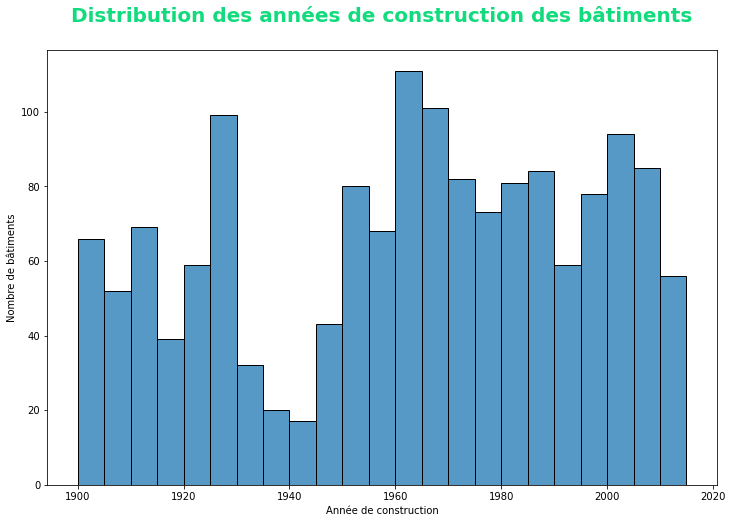

In [70]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=conso, x='YearBuilt', bins=int((conso.YearBuilt.max() - conso.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

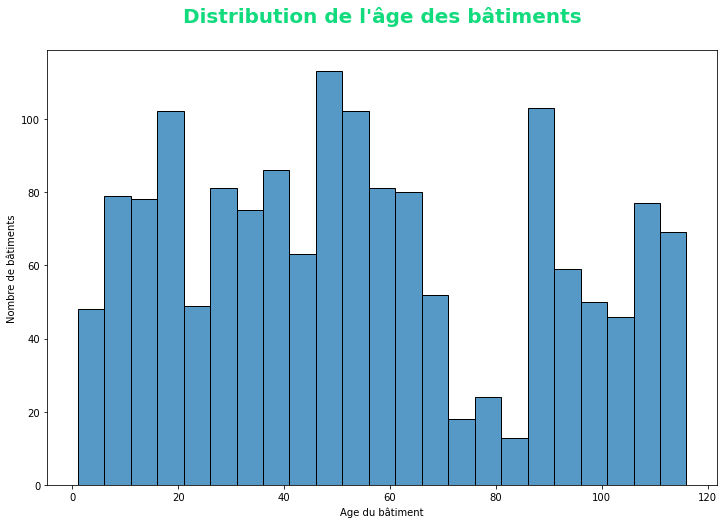

In [71]:
conso['BuildingAge'] = conso['DataYear'] - conso['YearBuilt']
conso.drop(['DataYear', 'YearBuilt'], axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=conso, x='BuildingAge', bins=int((conso.BuildingAge.max() - conso.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

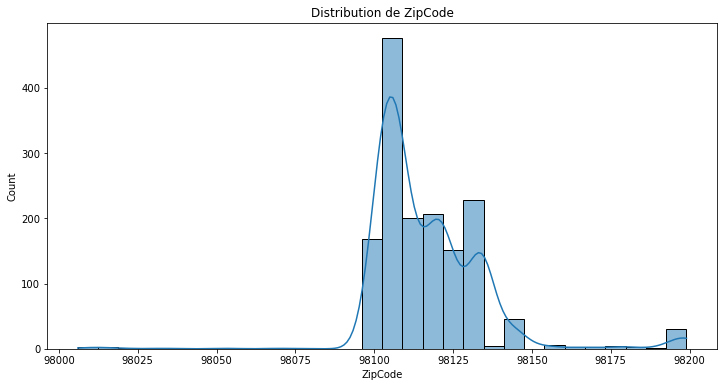

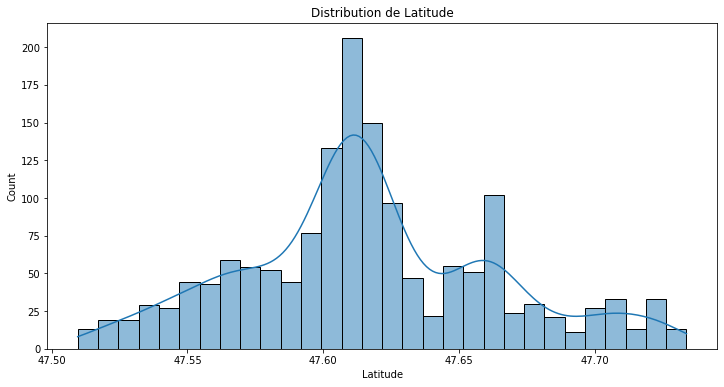

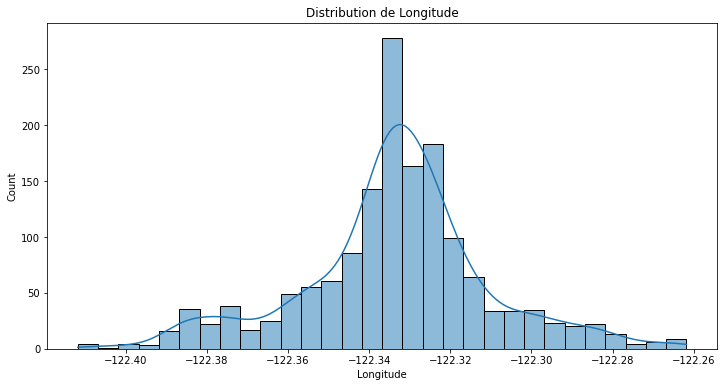

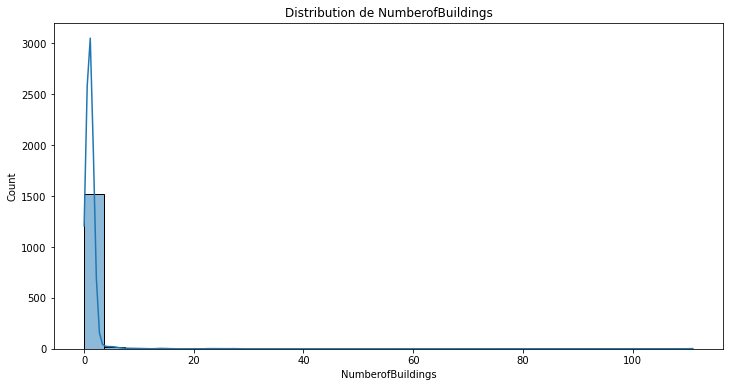

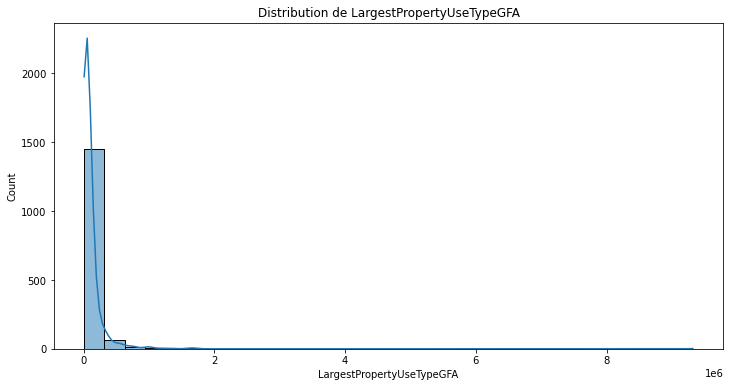

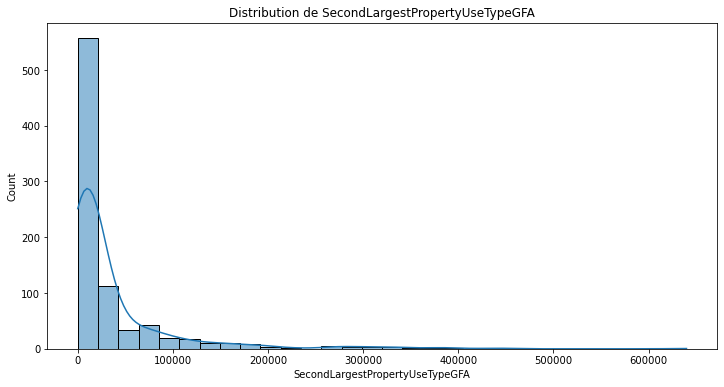

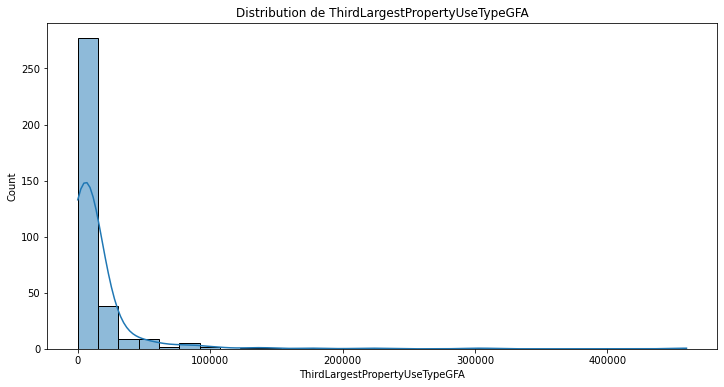

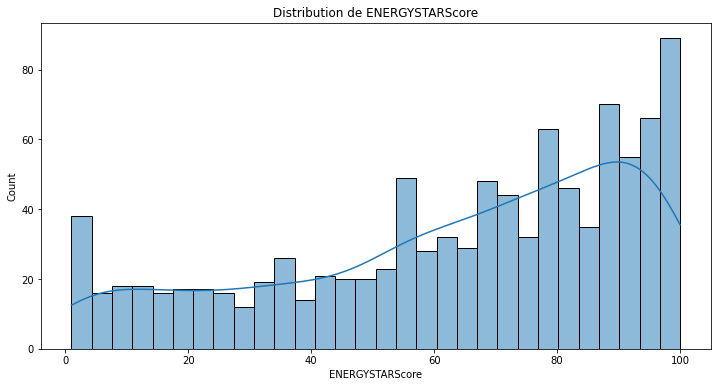

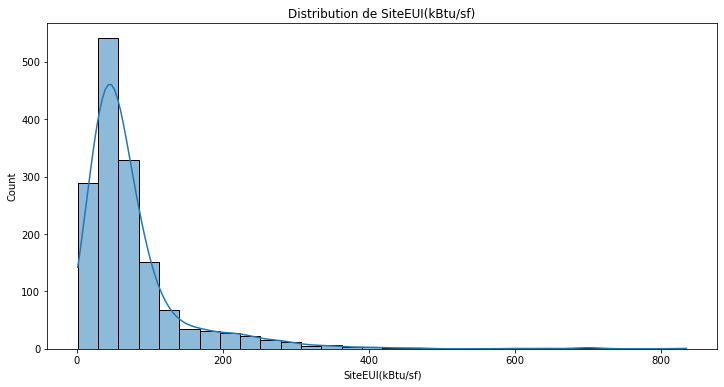

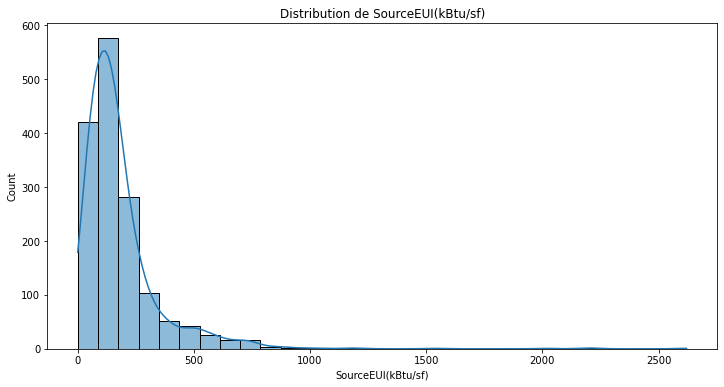

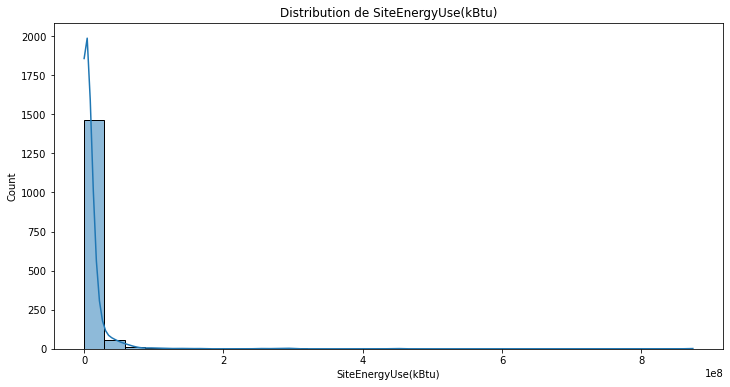

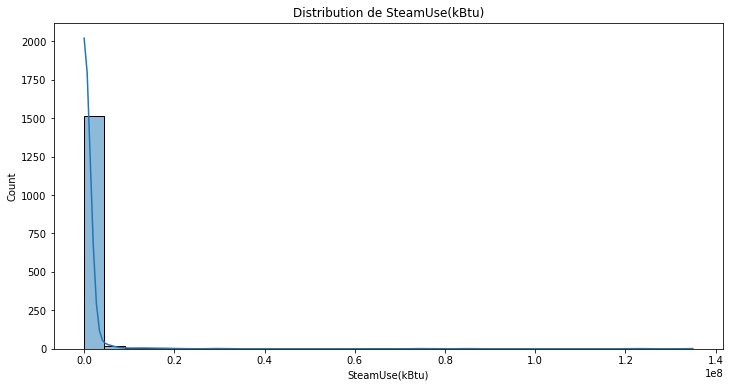

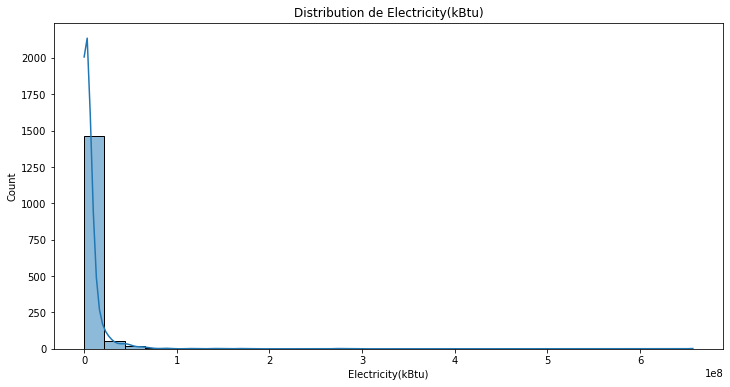

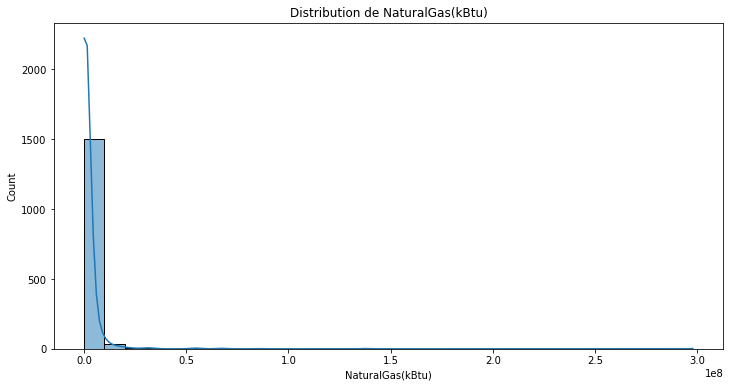

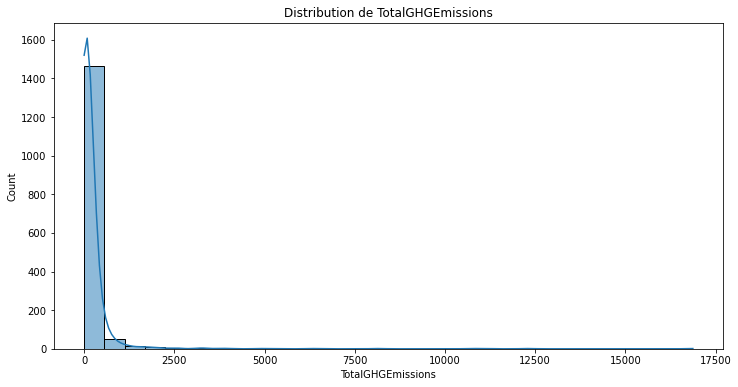

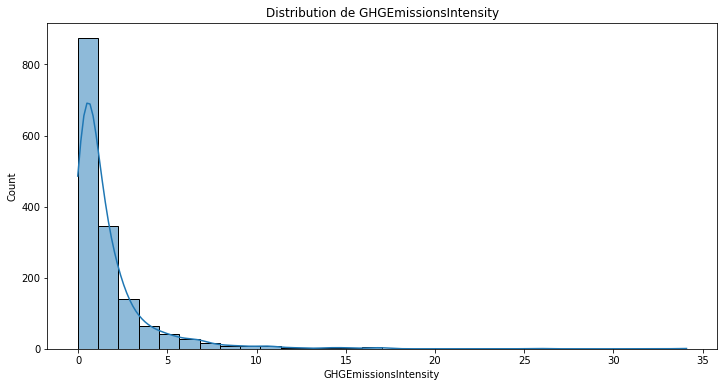

In [72]:
for column in conso.select_dtypes(['int32', 'float64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.histplot(conso[column].dropna(), bins=30, kde=True)

In [73]:
import folium
import folium.plugins

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(conso.Latitude, conso.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

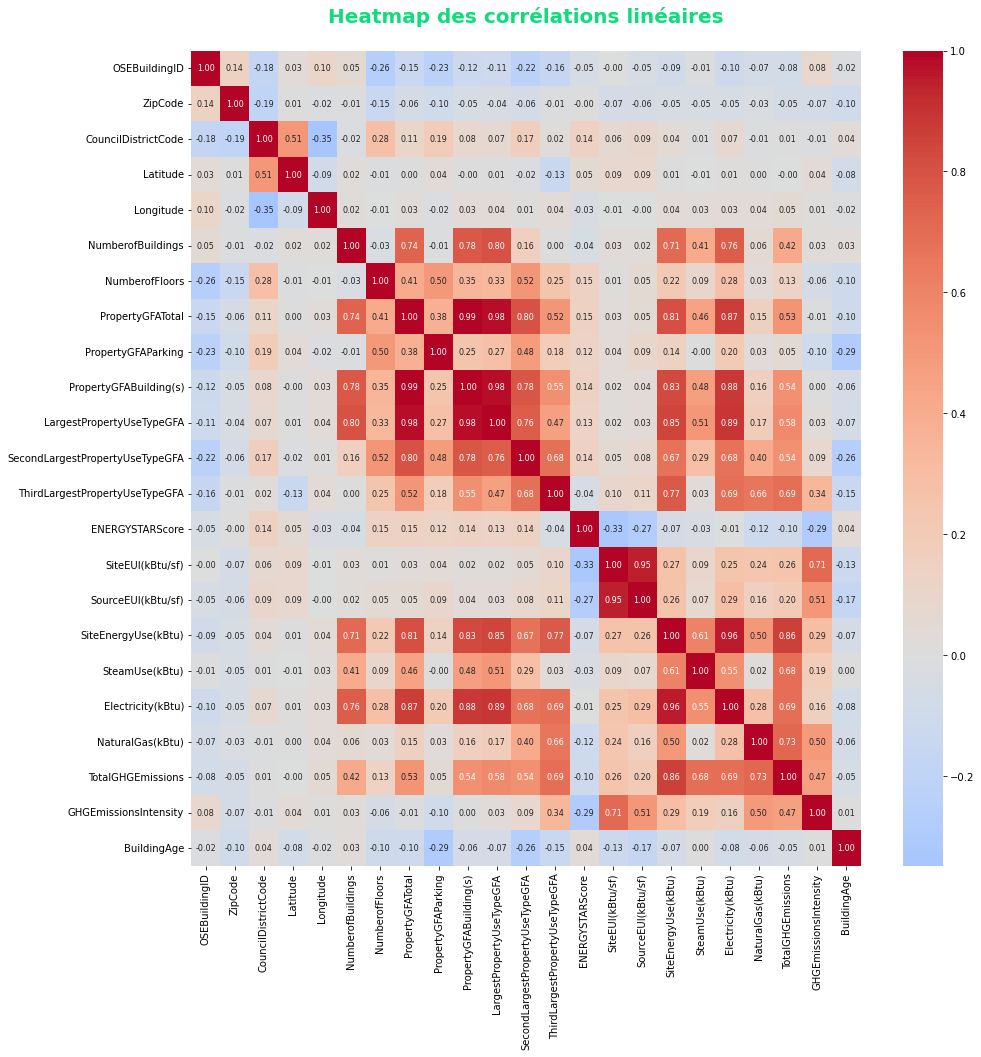

In [74]:
corr = conso.corr()

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

**Les variables à prédire du modèle seront :**

SiteEnergyUse(kBtu)

TotalGHGEmissions

On remarque sur ce Heatmap de fortes corrélations linéaires entre variables. Ces corrélations peuvent amener des problèmes de colinéarité dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :

In [75]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
44,PropertyGFABuilding(s),PropertyGFATotal,0.990378
42,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.982383
40,PropertyGFATotal,LargestPropertyUseTypeGFA,0.977735
38,Electricity(kBtu),SiteEnergyUse(kBtu),0.956267
36,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.946503
34,LargestPropertyUseTypeGFA,Electricity(kBtu),0.890226
32,Electricity(kBtu),PropertyGFABuilding(s),0.879717
30,Electricity(kBtu),PropertyGFATotal,0.868559
28,TotalGHGEmissions,SiteEnergyUse(kBtu),0.860023
26,SiteEnergyUse(kBtu),LargestPropertyUseTypeGFA,0.846843


Il va falloir retraiter toutes les features intégrant des notions de superficie

Contrôle des données sur les superficies

In [76]:
conso['propertyGFAtot'] = conso['PropertyGFABuilding(s)'] + conso['PropertyGFAParking']

In [77]:
(conso['propertyGFAtot'] == conso['PropertyGFATotal']).value_counts()

True    1548
dtype: int64

In [78]:
conso.drop(['PropertyGFATotal', 'propertyGFAtot'], axis=1, inplace=True)
conso.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1.0,12,0,88434,Hotel,Hotel,88434.0,non applicable,NaN,non applicable,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,249.98,2.83,89
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1.0,11,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,295.86,2.86,20
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1.0,41,196718,759392,Hotel,Hotel,756493.0,non applicable,NaN,non applicable,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,47
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1.0,10,0,61320,Hotel,Hotel,61320.0,non applicable,NaN,non applicable,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,286.43,4.67,90
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1.0,18,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,505.01,2.88,36


simplifions au maximum les features "utiles"

Pour les notions géographiques, on va conserver le 'Neighborhood', qui donne une notion exploitable de l'emplacement

In [79]:
conso = conso.drop(['PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude', 'Longitude'], axis=1)

Dans un 1er temps, nous ne conserverons pas les features liées au 'property use', car elles seront difficiles à encoder (grand nombre de valeurs uniques), on conserve uniquement 'LargestPropertyUseType'

In [80]:
conso = conso.drop(['ListOfAllPropertyUseTypes', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'], axis=1)

Pour l'EnergySTAR Score, on va conserver sa valeur mais pas l'année de certfication

In [81]:
conso = conso.drop(['YearsENERGYSTARCertified'], axis=1)

Le but de notre programme est de supprimer les relevés coûteux pour les années à venir. Nous allons donc exclure toutes les données de relève de notre dataset.

In [82]:
conso = conso.drop(['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)

Enfin, pour éviter encore les problèmes de colinéarité, on va suppromer les dernières features avec des rapports sur les superficies

In [83]:
conso = conso.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity'], axis=1)

In [84]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1548 non-null   int64  
 1   BuildingType            1548 non-null   object 
 2   PrimaryPropertyType     1548 non-null   object 
 3   Neighborhood            1548 non-null   object 
 4   NumberofBuildings       1548 non-null   float64
 5   NumberofFloors          1548 non-null   int64  
 6   PropertyGFAParking      1548 non-null   int64  
 7   PropertyGFABuilding(s)  1548 non-null   int64  
 8   LargestPropertyUseType  1548 non-null   object 
 9   ENERGYSTARScore         997 non-null    float64
 10  SiteEnergyUse(kBtu)     1548 non-null   float64
 11  TotalGHGEmissions       1548 non-null   float64
 12  BuildingAge             1548 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 201.6+ KB


In [85]:
conso.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
count,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,997.000000,1.548000e+03,1548.000000,1548.000000
mean,16497.944444,1.178941,4.276486,13842.337209,1.074898e+05,63.635908,8.860058e+06,193.608908,54.355943
std,13827.877766,3.039221,6.780694,43721.822291,2.926272e+05,28.825309,3.130568e+07,779.105278,32.886918
min,1.000000,0.000000,0.000000,0.000000,3.636000e+03,1.000000,5.713320e+04,-0.800000,1.000000
25%,602.750000,1.000000,1.000000,0.000000,2.793675e+04,44.000000,1.251083e+06,20.655000,27.000000
50%,21180.500000,1.000000,2.000000,0.000000,4.608400e+04,71.000000,2.732167e+06,49.845000,50.500000
75%,24609.000000,1.000000,4.000000,0.000000,9.556825e+04,88.000000,7.294487e+06,147.227500,86.000000
max,50226.000000,111.000000,99.000000,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,116.000000


On peut voir 2 anomalies à retraiter, à savoir des valeurs à 0, pour les features 'NumberofBuildings' et 'NumberofFloors'

In [86]:
conso[conso['NumberofBuildings']==0].sample(10)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
160,257,NonResidential,Warehouse,GREATER DUWAMISH,0.0,4,0,79600,Non-Refrigerated Warehouse,34.0,2.411402e+06,16.81,100
63,89,NonResidential,Medical Office,EAST,0.0,3,0,179014,Medical Office,48.0,1.670106e+07,430.84,51
1177,21180,NonResidential,Other,LAKE UNION,0.0,3,0,53103,Other,NaN,4.877959e+06,38.12,20
3232,49862,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,0.0,1,0,29000,Other,NaN,2.429214e+06,54.98,54
608,812,NonResidential,Warehouse,GREATER DUWAMISH,0.0,1,0,65288,Non-Refrigerated Warehouse,NaN,6.059712e+05,4.22,99
2963,27673,NonResidential,Hotel,DOWNTOWN,0.0,10,22225,370327,Hotel,23.0,1.745756e+07,423.57,10
488,657,NonResidential,Mixed Use Property,DOWNTOWN,0.0,0,0,516407,Parking,31.0,3.940332e+07,734.72,10
985,20427,NonResidential,Mixed Use Property,SOUTHWEST,0.0,2,0,23315,Office,NaN,1.354001e+06,35.04,90
477,640,NonResidential,Large Office,GREATER DUWAMISH,0.0,6,0,1380959,Office,79.0,7.413058e+07,810.70,104
365,517,NonResidential,Supermarket / Grocery Store,NORTHWEST,0.0,1,0,144776,Wholesale Club/Supercenter,56.0,1.342408e+07,237.39,32


In [87]:
len(conso[conso['NumberofBuildings']==0])

52

In [88]:
conso['NumberofBuildings']= conso['NumberofBuildings'].replace([0],[1])

In [89]:
len(conso[conso['NumberofBuildings']==0])

0

In [90]:
conso[conso['NumberofFloors']==0].sample(10)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
3273,49966,NonResidential,Other,SOUTHEAST,1.0,0,0,40265,Pre-school/Daycare,NaN,2.159170e+06,51.39,7
3280,49983,NonResidential,Residence Hall,NORTHEAST,1.0,0,0,97040,Residence Hall/Dormitory,69.0,3.894142e+06,62.41,5
564,758,NonResidential,Other,DOWNTOWN,1.0,0,0,947987,Other - Mall,NaN,4.651096e+07,324.25,17
3132,40034,NonResidential,Small- and Mid-Sized Office,NORTHEAST,1.0,0,0,21931,Office,32.0,3.947209e+06,145.11,56
3278,49979,NonResidential,Residence Hall,NORTHEAST,1.0,0,0,166991,Residence Hall/Dormitory,19.0,1.596586e+07,437.20,63
487,656,NonResidential,Medical Office,EAST,1.0,0,0,225982,Medical Office,53.0,2.056062e+07,692.12,12
3130,40028,NonResidential,Warehouse,NORTHEAST,1.0,0,0,384772,Non-Refrigerated Warehouse,69.0,1.520676e+07,391.70,76
3274,49967,Campus,University,NORTHEAST,111.0,0,0,9320156,College/University,NaN,8.739237e+08,11140.56,116
3279,49980,NonResidential,Residence Hall,NORTHEAST,1.0,0,0,89392,Residence Hall/Dormitory,16.0,6.960904e+06,48.53,46
166,267,NonResidential,Hotel,DOWNTOWN,1.0,0,0,934292,Hotel,NaN,6.504728e+07,1638.46,17


In [91]:
len(conso[conso['NumberofFloors']==0])

16

In [92]:
conso['NumberofFloors']= conso['NumberofFloors'].replace([0],[1])

In [93]:
len(conso[conso['NumberofFloors']==0])

0

In [94]:
test_imputation = conso[conso['PrimaryPropertyType'] == 'Hospital']
test_imputation

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
98,147,NonResidential,Hospital,BALLARD,4.0,5,0,285333,Hospital (General Medical & Surgical),14.0,6.809073e+07,1990.50,62
124,198,NonResidential,Hospital,NORTHEAST,6.0,10,0,879000,Hospital (General Medical & Surgical),10.0,2.538325e+08,8145.52,63
167,268,NonResidential,Hospital,CENTRAL,6.0,5,0,597519,Hospital (General Medical & Surgical),34.0,1.434230e+08,4906.33,26
170,276,NonResidential,Hospital,EAST,9.0,8,0,1158691,Hospital (General Medical & Surgical),29.0,2.930908e+08,10734.57,16
355,498,NonResidential,Hospital,LAKE UNION,1.0,7,150455,201075,Hospital (General Medical & Surgical),23.0,4.270962e+07,1032.63,16
618,828,NonResidential,Hospital,EAST,7.0,14,0,1765970,Hospital (General Medical & Surgical),54.0,2.916144e+08,12307.16,22
1672,23071,NonResidential,Hospital,NORTHWEST,8.0,1,0,415632,Hospital (General Medical & Surgical),85.0,9.896078e+07,3278.11,50
2482,25772,NonResidential,Hospital,SOUTHWEST,1.0,3,0,54863,Hospital (General Medical & Surgical),100.0,2.037721e+06,14.21,55
3187,49732,NonResidential,Hospital,NORTHEAST,1.0,8,0,330000,Hospital (General Medical & Surgical),58.0,5.776441e+07,1789.69,3
3264,49940,NonResidential,Hospital,EAST,1.0,8,0,374466,Hospital (General Medical & Surgical),74.0,1.639460e+08,6330.91,96


In [95]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1548 non-null   int64  
 1   BuildingType            1548 non-null   object 
 2   PrimaryPropertyType     1548 non-null   object 
 3   Neighborhood            1548 non-null   object 
 4   NumberofBuildings       1548 non-null   float64
 5   NumberofFloors          1548 non-null   int64  
 6   PropertyGFAParking      1548 non-null   int64  
 7   PropertyGFABuilding(s)  1548 non-null   int64  
 8   LargestPropertyUseType  1548 non-null   object 
 9   ENERGYSTARScore         997 non-null    float64
 10  SiteEnergyUse(kBtu)     1548 non-null   float64
 11  TotalGHGEmissions       1548 non-null   float64
 12  BuildingAge             1548 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 201.6+ KB


In [96]:
conso.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
count,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,997.000000,1.548000e+03,1548.000000,1548.000000
mean,16497.944444,1.212532,4.286822,13842.337209,1.074898e+05,63.635908,8.860058e+06,193.608908,54.355943
std,13827.877766,3.031517,6.774923,43721.822291,2.926272e+05,28.825309,3.130568e+07,779.105278,32.886918
min,1.000000,1.000000,1.000000,0.000000,3.636000e+03,1.000000,5.713320e+04,-0.800000,1.000000
25%,602.750000,1.000000,1.000000,0.000000,2.793675e+04,44.000000,1.251083e+06,20.655000,27.000000
50%,21180.500000,1.000000,2.000000,0.000000,4.608400e+04,71.000000,2.732167e+06,49.845000,50.500000
75%,24609.000000,1.000000,4.000000,0.000000,9.556825e+04,88.000000,7.294487e+06,147.227500,86.000000
max,50226.000000,111.000000,99.000000,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,116.000000


Une dernière "anomalie" existe sur la feature à prédire 'TotalGHGEmissions', à savoir des valeurs négatives proches de 0

In [97]:
conso[conso['TotalGHGEmissions']<=0]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
513,700,NonResidential,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,1.0,1,0,57176,Supermarket/Grocery Store,31.0,1.252517e+07,0.0,8
3206,49784,NonResidential,Small- and Mid-Sized Office,CENTRAL,1.0,6,0,52000,Office,100.0,3.427261e+05,-0.8,3


In [98]:
conso.TotalGHGEmissions = np.where(conso.TotalGHGEmissions <= 0, 0.001, conso.TotalGHGEmissions)

In [99]:
conso.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
count,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,997.000000,1.548000e+03,1548.000000,1548.000000
mean,16497.944444,1.212532,4.286822,13842.337209,1.074898e+05,63.635908,8.860058e+06,193.609426,54.355943
std,13827.877766,3.031517,6.774923,43721.822291,2.926272e+05,28.825309,3.130568e+07,779.105149,32.886918
min,1.000000,1.000000,1.000000,0.000000,3.636000e+03,1.000000,5.713320e+04,0.001000,1.000000
25%,602.750000,1.000000,1.000000,0.000000,2.793675e+04,44.000000,1.251083e+06,20.655000,27.000000
50%,21180.500000,1.000000,2.000000,0.000000,4.608400e+04,71.000000,2.732167e+06,49.845000,50.500000
75%,24609.000000,1.000000,4.000000,0.000000,9.556825e+04,88.000000,7.294487e+06,147.227500,86.000000
max,50226.000000,111.000000,99.000000,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,116.000000


In [100]:
conso.set_index("OSEBuildingID").to_csv("building-energy-cleaned.csv")